# Prototyping Notebook for the "The Rust and the Python" special coding session

In [1]:
import gmm
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data, _ = gmm.make_blobs(n_samples=10000, centers=10, n_features=2, random_state=9)
data.shape

(10000, 2)

In [6]:
model = gmm.initialize(data, 10)

for i in range(1000):
    r = gmm.expect(model, data)

    # Visual check 

    if i < 2:
        gmm.maximize(model, r, data)
        print(model.means)
        print(model.weights)
        print(model.covs)

    gmm.maximize_v2(model, r, data)
    if i< 2:
        print(model.means)
        print(model.weights)
        print(model.covs)
    

[[-1.26984616 -1.47674169]
 [-1.1272454  -1.35398377]
 [-1.09864588 -1.45539577]
 [-1.07043464 -1.46660892]
 [-1.09839793 -1.37903735]
 [-1.22206998 -1.419414  ]
 [-1.19871286 -1.29379611]
 [-1.10459021 -1.30933906]
 [-1.24108602 -1.41449509]
 [-1.2050598  -1.374571  ]]
[0.1002544  0.09910398 0.10169767 0.10007749 0.10032119 0.09899128
 0.1001409  0.10040634 0.09977584 0.09923092]
[[[41.98616938 -3.99360562]
  [-3.99360562 28.05724722]]

 [[42.29130738 -3.84667259]
  [-3.84667259 28.31431641]]

 [[42.11271085 -3.68474116]
  [-3.68474116 28.12173376]]

 [[42.29013677 -4.28606548]
  [-4.28606548 28.51828183]]

 [[42.07415116 -3.56167954]
  [-3.56167954 28.19934167]]

 [[41.94520609 -3.5582715 ]
  [-3.5582715  27.94319633]]

 [[41.78091909 -2.82868988]
  [-2.82868988 27.79068184]]

 [[41.99624552 -3.36428801]
  [-3.36428801 28.25149503]]

 [[42.10957874 -4.42925556]
  [-4.42925556 28.46061935]]

 [[42.10908791 -3.82557279]
  [-3.82557279 28.25312602]]]
[[-1.26984616 -1.47674169]
 [-1.1272

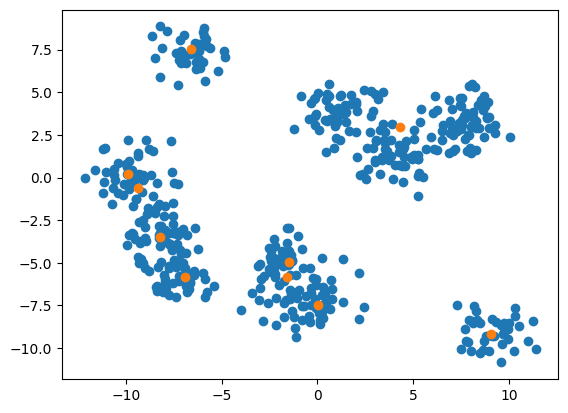

In [7]:
plt.scatter(data[:500,0],data[:500,1])
plt.scatter(model.means[:,0],model.means[:,1])


## Benchmarking

Check pure python with einsum

In [8]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)
model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[-0.06633611  0.0901855 ]
 [-0.0602956   0.14686148]
 [ 0.00871002  0.03049041]
 [ 0.08826959  0.11847179]
 [-0.00818262  0.03774499]
 [-0.06936079  0.11778129]
 [-0.03614726  0.13939296]
 [-0.09905992  0.04679937]
 [ 0.01300317  0.15018894]
 [-0.11940321  0.17455559]
 [ 0.00902831  0.06467068]
 [ 0.0220613   0.10279665]
 [-0.03921833  0.133768  ]
 [-0.05623635  0.03711395]
 [-0.02167991 -0.01481772]
 [ 0.00595009  0.17546147]
 [-0.1006334   0.24122992]
 [ 0.02800523  0.02967289]
 [ 0.0102417   0.01509761]
 [-0.03586631  0.11855295]]


In [9]:
%%timeit 
gmm.maximize(model, r, data)

13 ms ± 369 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Check pure python version with loops

In [10]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)


model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[ 0.06228055  0.14972101]
 [ 0.00475151  0.05685992]
 [ 0.01941143  0.0224498 ]
 [-0.04607523 -0.00534162]
 [-0.09413704  0.13392658]
 [-0.03452991  0.14321828]
 [-0.01956931  0.01370221]
 [-0.05483264  0.13864385]
 [-0.05633603  0.12909055]
 [ 0.02825212  0.1204899 ]
 [-0.07338069  0.16252112]
 [-0.11497166  0.09015267]
 [-0.05470526  0.17366726]
 [-0.03843751  0.12525343]
 [ 0.02346205  0.07059102]
 [-0.02500397  0.17060503]
 [ 0.01358369  0.04228827]
 [-0.0515242   0.00499494]
 [-0.02780934  0.16420111]
 [ 0.01343115  0.05360584]]


In [11]:
%%timeit 
gmm.maximize_v0(model, r, data)

7.37 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Check parallel Rust version

In [12]:
data, _ = gmm.make_blobs(n_samples=10000, centers=20, n_features=2, random_state=7)


model = gmm.initialize(data, 20)
print(",",model.means)
r = gmm.expect(model, data)

, [[-0.03159428  0.10006771]
 [-0.05609374  0.04198515]
 [ 0.0670805   0.00330144]
 [-0.01837631  0.10449612]
 [ 0.03849247  0.04043091]
 [-0.01531526  0.12149099]
 [-0.05640319  0.10296453]
 [ 0.03953255  0.09916986]
 [ 0.01683882  0.0936038 ]
 [-0.01148991  0.11873639]
 [-0.0853376   0.15004799]
 [-0.04266247  0.1684343 ]
 [-0.14422096  0.0815848 ]
 [-0.07031131  0.10014934]
 [ 0.02431878  0.10615351]
 [-0.10166858  0.14553696]
 [ 0.005781   -0.005505  ]
 [-0.05142393  0.1128555 ]
 [-0.00923336  0.07464357]
 [-0.01956176  0.19901983]]


In [14]:
%%timeit 
gmm.maximize_v2(model, r, data)

3.49 ms ± 23.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


… or run the benchmark function

In [1]:
import gmm
gmm.bench()

With einsum — fastest: 0.028547351938999783, slowest: 0.029028527366999696, mean: 0.028806246293714203 
With loops — fastest: 0.02038862917100005, slowest: 0.02063717341199981, mean: 0.020572978542571427 
With loops — fastest: 0.012348123220000161, slowest: 0.015724272164000012, mean: 0.014820868072571557 
